In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Input.xlsx')

In [39]:
df

,Day,Mood,Activity-1,Activity-2
0,Monday,Sad,Work,Heavy Workload
1,Tuesday,Sad,Relationships,Argument
2,Wednesday,Lonely,Routine,Daily Monotony
3,Thursday,Neutral,Routine,Daily Monotony
4,Friday,Happy,Leisure,Friends Gathering
...,...,...,...,...
100,Wednesday,Lonely,Relationships,Argument
101,Thursday,Neutral,Routine,Busy Schedule
102,Friday,Happy,Leisure,Relaxing
103,Saturday,Happy,Leisure,Relaxing


In [4]:
print(df.head())

         Day     Mood     Activity-1         Activity-2
0     Monday      Sad           Work     Heavy Workload
1    Tuesday      Sad  Relationships           Argument
2  Wednesday   Lonely        Routine     Daily Monotony
3   Thursday  Neutral        Routine     Daily Monotony
4     Friday    Happy        Leisure  Friends Gathering


In [5]:
print(df.shape)

(105, 4)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Day         105 non-null    object
 1   Mood        105 non-null    object
 2   Activity-1  105 non-null    object
 3   Activity-2  105 non-null    object
dtypes: object(4)
memory usage: 3.4+ KB
None


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Mood')

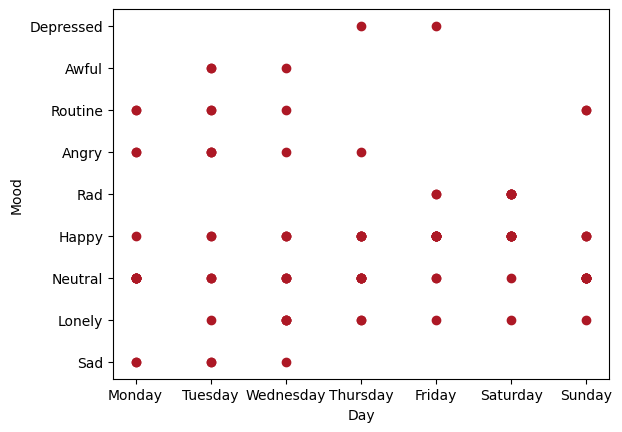

In [35]:
plt.scatter(df['Day'], df['Mood'], color = '#ad1825')
plt.xlabel('Day')
plt.ylabel('Mood')

Text(0, 0.5, 'Activity-1')

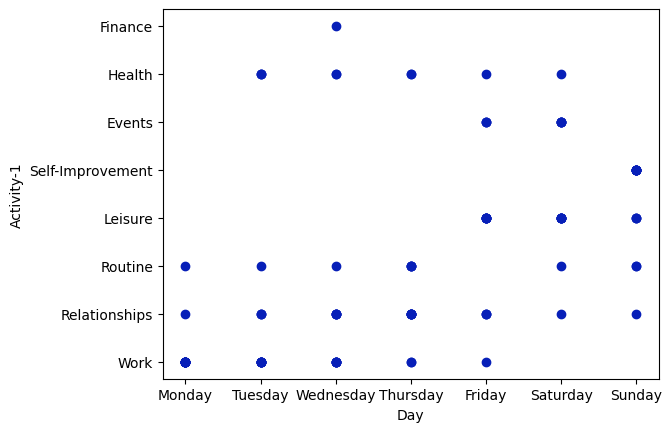

In [38]:
plt.scatter(df['Day'], df['Activity-1'], color='#071fb8')
plt.xlabel('Day')
plt.ylabel('Activity-1')

Text(0, 0.5, 'Activity-1')

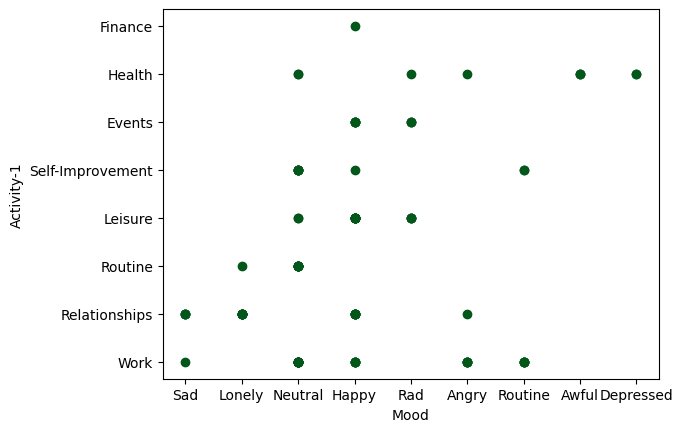

In [37]:
plt.scatter(df['Mood'], df['Activity-1'], color='#03571a')
plt.xlabel('Mood')
plt.ylabel('Activity-1')

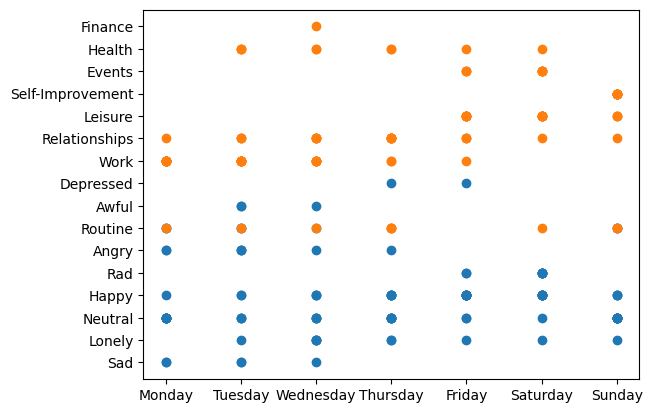

In [27]:
plt.scatter(df['Day'], df['Mood'])
plt.scatter(df['Day'], df['Activity-1'])

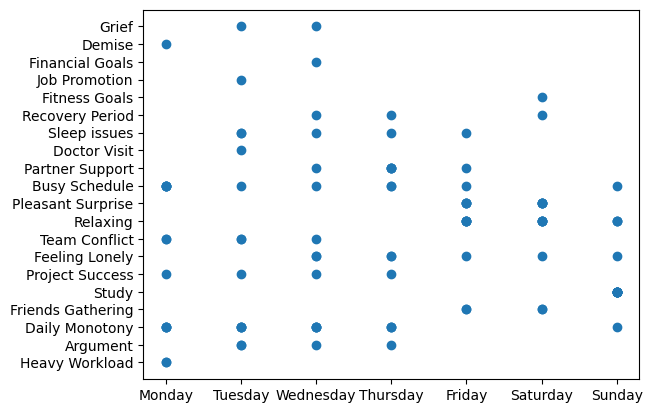

In [14]:
plt.scatter(df['Day'], df['Activity-2'])

In [79]:

from sklearn.preprocessing import LabelEncoder


In [130]:
label_encoder = LabelEncoder()
df['activity_1_encoded'] = label_encoder.fit_transform(df['Activity-1'])


In [131]:

df['mood_encoded'] = label_encoder.fit_transform(df['Mood'])

In [132]:

df['day_encoded'] = label_encoder.fit_transform(df['Day'])

In [99]:


T = df.iloc[:,4:-1]
T

,mood_encoded,day_encoded
0,8,1
1,8,5
2,4,6
3,5,4
4,3,0
...,...,...
100,4,6
101,5,4
102,3,0
103,3,2


In [102]:
G = df.iloc[:,2:-4]
G

,Activity-1
0,7
1,4
2,5
3,5
4,3
...,...
100,4
101,5
102,3
103,3


In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [104]:
X_train, X_test, y_train, y_test = train_test_split(T, G, test_size=0.2, random_state=42)

In [105]:
X_train

,mood_encoded,day_encoded
55,3,3
22,7,5
76,7,3
44,5,6
72,3,6
...,...,...
71,3,5
14,0,1
92,8,5
51,5,6


In [106]:
y_train

,Activity-1
55,3
22,7
76,6
44,2
72,1
...,...
71,7
14,7
92,4
51,7


In [107]:
X_test

,mood_encoded,day_encoded
30,3,6
65,5,6
64,0,5
53,3,0
45,5,4
94,2,4
104,5,3
47,3,2
10,4,4
0,8,1


In [109]:
y_test

,Activity-1
30,4
65,7
64,7
53,4
45,5
94,2
104,6
47,0
10,4
0,7


In [127]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.6041666666666666, 0.9166666666666666, 'x[1] <= 3.5\ngini = 0.82\nsamples = 84\nvalue = [6, 1, 8, 13, 14, 8, 8, 26]'),
 Text(0.35833333333333334, 0.75, 'x[1] <= 2.5\ngini = 0.808\nsamples = 48\nvalue = [6, 0, 2, 13, 4, 3, 8, 12]'),
 Text(0.21666666666666667, 0.5833333333333334, 'x[1] <= 1.5\ngini = 0.746\nsamples = 34\nvalue = [6, 0, 2, 10, 3, 1, 0, 12]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.698\nsamples = 25\nvalue = [3, 0, 1, 5, 3, 1, 0, 12]'),
 Text(0.06666666666666667, 0.25, 'x[0] <= 2.5\ngini = 0.722\nsamples = 12\nvalue = [3, 0, 1, 5, 2, 0, 0, 1]'),
 Text(0.03333333333333333, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.678\nsamples = 11\nvalue = [3, 0, 0, 5, 2, 0, 0, 1]'),
 Text(0.2, 0.25, 'x[0] <= 7.5\ngini = 0.272\nsamples = 13\nvalue = [0, 0, 0, 0, 1, 1, 0, 11]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.153\nsamples = 12\nvalue = [0, 0, 0,

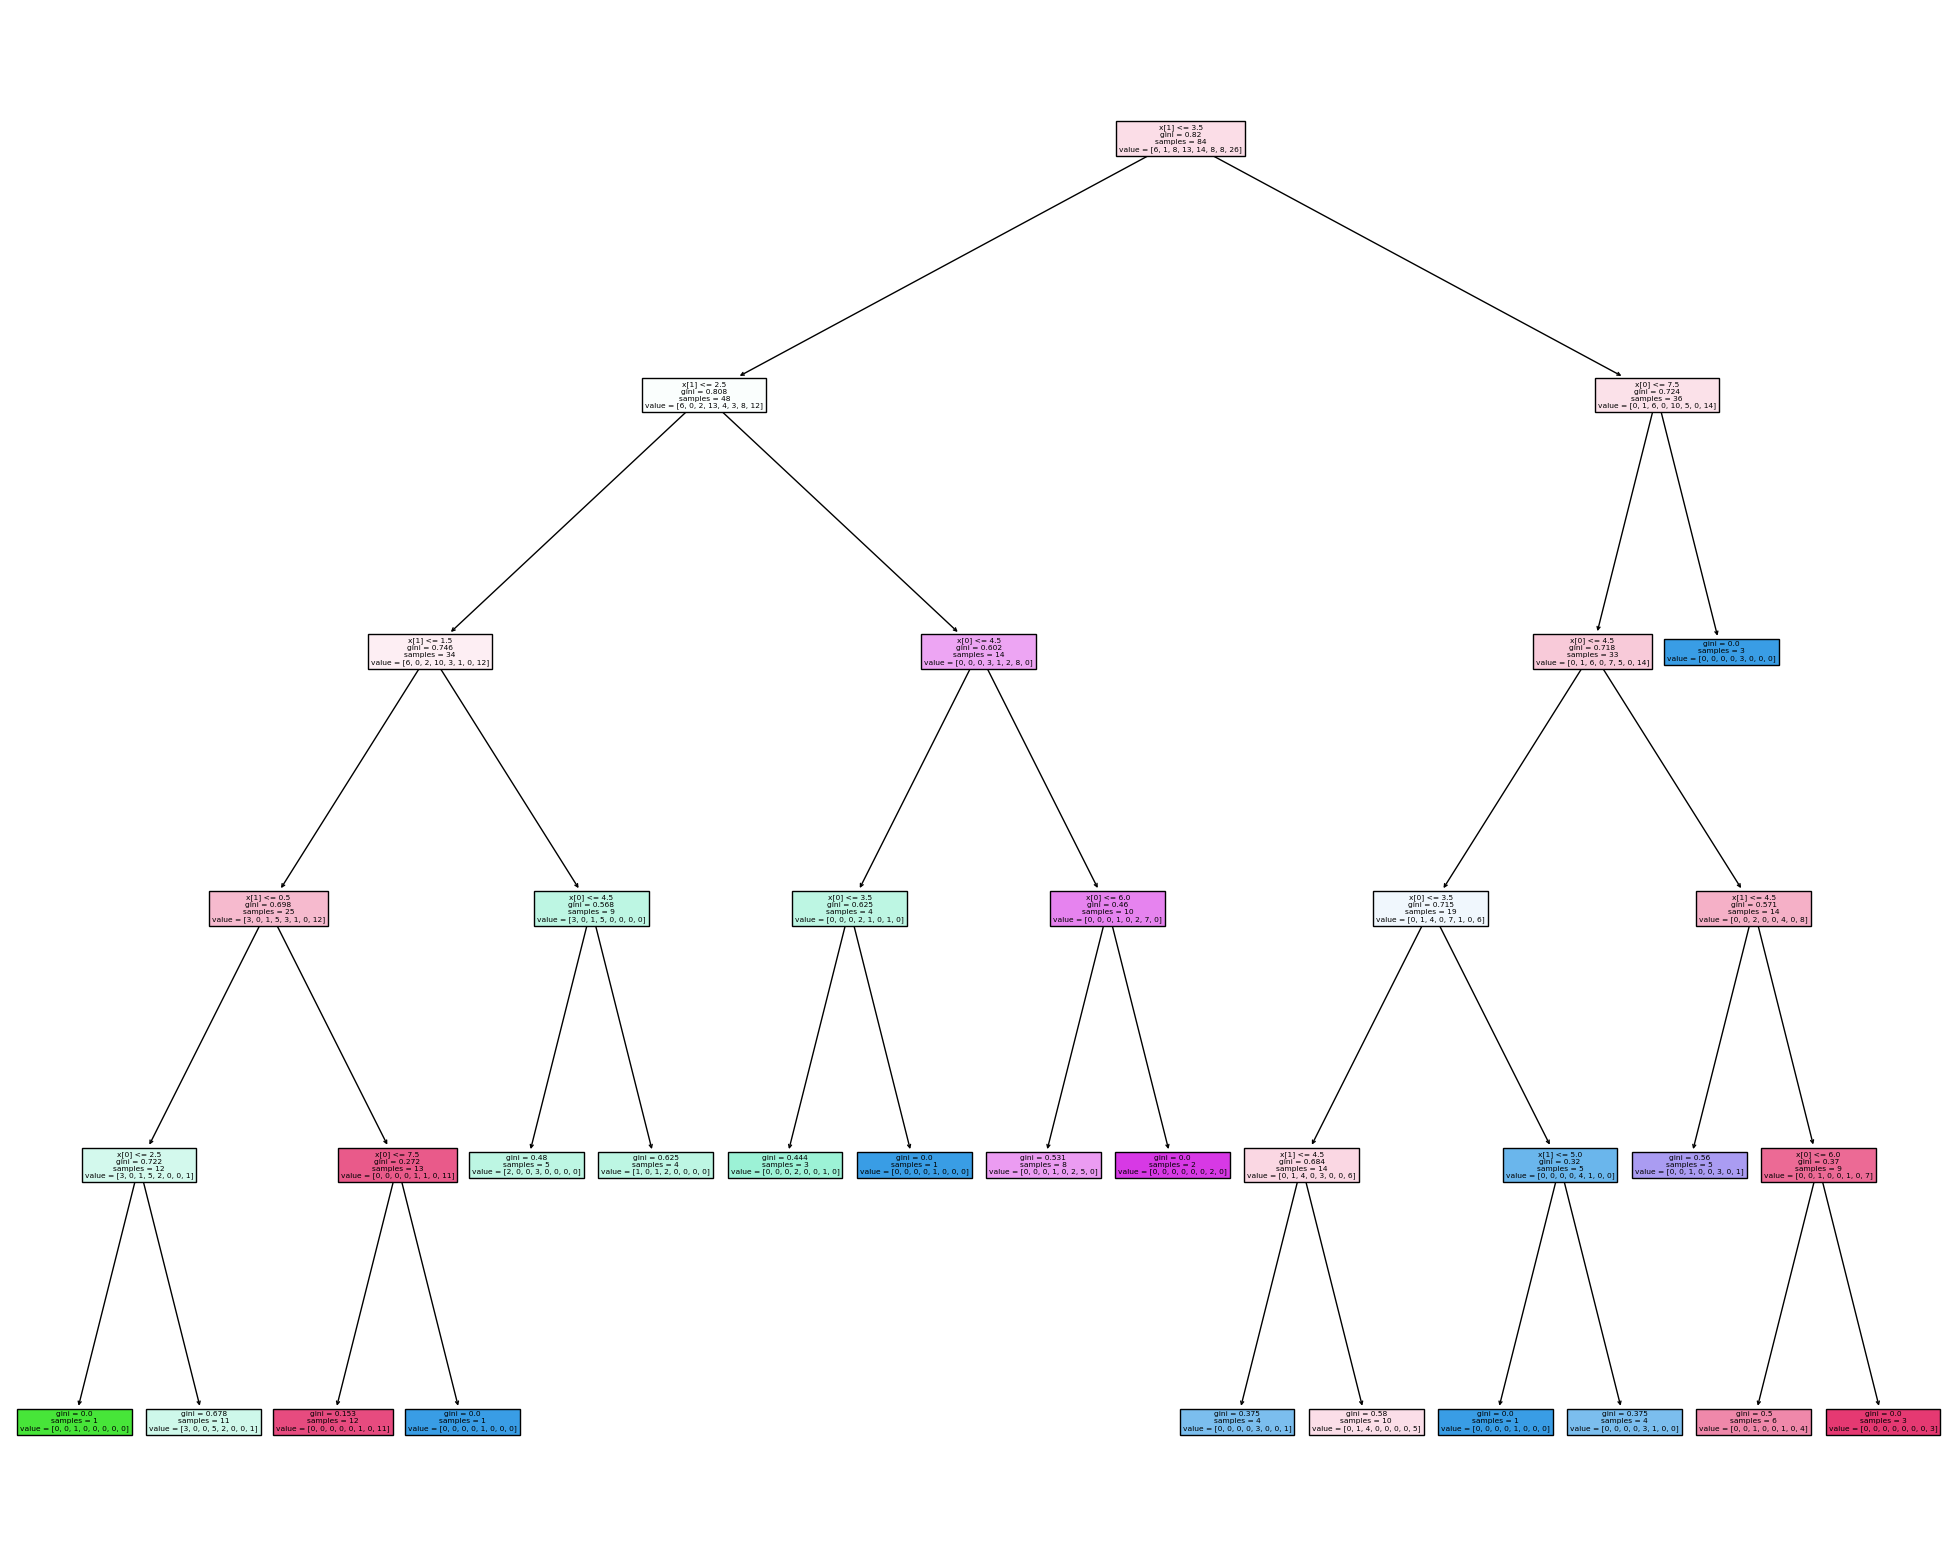

In [128]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True)

In [117]:
y_pred = clf.predict(X_test)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5238095238095238


In [126]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.50      0.33      0.40         6
           4       0.71      0.71      0.71         7
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       0.75      0.43      0.55         7

    accuracy                           0.52        21
   macro avg       0.42      0.35      0.38        21
weighted avg       0.68      0.52      0.58        21

